## 3 Numpy

Numpy is a python module that adds support for creating and manipulating multi-dimensional arrays, along with several mathematical functions that work on arrays. We will use mostly 1-D (vectors) and 2-D arrays (matrices) for the course, although at the end we will use some 4-D arrays (tensors).

To load numpy we will use import numpy as np and then we can create arrays by using np:

- 1-D array of size n filled with zeros or ones: np.zeros(n) or np.ones(n).
- 2-D array of size n x m filled with zeros : np.zeros((n,m)).
- Get the length of array x with len(x) or shape with a.shape.
- Sum and subtract arrays with +, -, multiply and divide with *, /.
- Modify the k-th ($0≤k<n$, $n=len(x)$) entry of x with a value val: x[k]=val, for example x[2]=1.0.
- Use mathematical functions on x such as np.cos(x), np.sin(x), np.exp(x), np.sqrt(x), np.power(x,2.0) ($x^2$).
- Math constants np.pi ($\pi$) and 1j ($i$), and many, many more capabilities.


Finally to assign a variable named "x" to an array we use the = operator, for example x=np.zeros(10) or y=np.cos(x).

In [1]:
import numpy as np
from scipy import linalg, integrate

import quantumworldX as qw

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
x = np.zeros(3)

for i in range(len(x)):
    x[i] = i

print(x)

myFunc = lambda x: 5 * np.cos(0.2 * x) + 1
myVecFunc =  np.vectorize(myFunc)

y = myVecFunc(x)
# print(y)

[ 0.  1.  2.]


## 5 Iterating on Grids

To deal with continuous spaces we will often resort to discretizing the space with numerical grids, these will commonly span a range of values from start to a stop point, and have several points evenly sampled in between this range. We can use numpy's linspace to easily create a grid via the syntax np.linspace(start,finish,num), for example if we want 20 points between 00 and ππ we would use np.linspace(0,np.pi,20).

Sometimes we will have to operate on each value of a list or array individually, for this we will use a for-loop:

```python
for i in ['chicken', 'beef','pastor']:
    print(i+' tacos ')
```

And sometimes we will also need the index of the item for this we can use enumerate(), most commonly to save the new result to another array:

```python
x=np.linspace(0,np.pi,20)
y=np.zeros(len(x))
for index,item in enumerate(x):
    y[index] = special_function(item)
```

**Instructions:**

- Create an array x from $[−\pi,\pi]$ with 100 points from start to end in this range.
- Create an array y of same size as x.
- Use a for-loop to apply the following formula to each $x_i$ of $x$ and save the result in $y$: $y_i = \frac{x_i^2}{\text{index} + 1}$

In [3]:
# create variables
x = np.linspace(-3.14159, 3.14159, 100)

# use a for-loop
y1 = []
def myFormula(x, y):
    return (x**2) / (y + 1)

for i in range(len(x)):
    y1.append(myFormula(x[i], i))
    
y = np.array(y1)

## 6 Slicing Arrays

Another common technique we will use with array is called slicing, which is just taking a slice or subset of an array. To illustrate, let's consider a 1-D array x of size n, so we can use it in the following ways:

- Select all elements after the k-th element: x[k:] (size n-k)
- Select all elements before the last k-th element: x[:-k] (size n-k)
- Select all elements between the k-th and m-th element (k<m) : x[k:m] (size m-k)


For a 2-D array x of n rows by m columns, there is an extra trick that might be useful:

- Retrieve the k-th column: x[:,k] (1-D array of size n)
- Retrieve the k-th row: x[k,:] (1-D array of size m)

We can compound slicing notation for example to select the second and third row and column of would be: x[1:3,1:3] (2-D array of shape (2,2) ). 

**Instructions:**
- Save the last three entries in the 5th row of x into a 1-D array called y.
- Use slicing notations to retrieve a 2-D array that does not contain the first column, last column, first row and last row of x, and save this array into a variable z.

In [4]:
x = np.array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

In [5]:
y = x[4, -3:]
z = x[1:-1, 1:-1]

## 7 Scipy

Scipy is a library built on top of numpy to provide high level, commonly used scientific tools. Scipy is usually imported as: ` import scipy as sp` and it contains several sub-modules such as `sp.linalg` for linear algebra or `sp.integrate` for integration procedures.

The mathematics of Quantum Mechanics is mostly linear algebra, so the most common operations that we will be using are:

- Complex inner products $⟨v,w⟩$ using np.vdot(v,w).
- Matrix-Matrix, Matrix-vector and vector-vector multiplication with np.dot(v,w).
- Vector norms $|v|$ using scipy.linalg.norm(v).
- Integration of a function: $\int_b^a f(x)dx$ with scipy.integrate.quad(f,a,b), will also return the error of integration.
- Integration of a grid via Simpson's Rule with scipy.integrate.simps(y,x).
- Solve an eigenvalue problem for hermitian matrices: $Av = \lambda v$ using scipy.linalg.eigvalsh(A).

**Instructions:**
Assumptions: v,w,x,y and A are arrays that are loaded for this exercise. scipy.linalg and scipy.integrate have already been imported.

- Tip: To undestand what type of data/objects a function will return use `help(function_name)` in your ipython terminal.
- Import the scipy module.
- Calculate the norm of $v$ and save the result in the variable v_norm, do the same for $w$ with a variable w_norm.
- Calculate inner product of $v$ and $w$ and save it in vw_dot.
- Calculate the area of the cosine function np.cos in the interval $[0,1]$ and save the area into area_quad. You might get extra values from this function, you can save both values seperately using the syntax area, error =....
- Calculate the area using grids, using $x$ and $y$ and save the result in area_simps.
- Calculate the positive difference in area between both methods and save the result in area_diff.
- Finally calculate eigenvalues of $A$ and store them in e_vals.

In [6]:
# Assumption Imports
v = np.array([ 2.5,  0. ])
w = np.array([ 0.  ,  0.45])
x = np.array([ 0.        ,  0.01010101,  0.02020202,  0.03030303,  0.04040404,
        0.05050505,  0.06060606,  0.07070707,  0.08080808,  0.09090909,
        0.1010101 ,  0.11111111,  0.12121212,  0.13131313,  0.14141414,
        0.15151515,  0.16161616,  0.17171717,  0.18181818,  0.19191919,
        0.2020202 ,  0.21212121,  0.22222222,  0.23232323,  0.24242424,
        0.25252525,  0.26262626,  0.27272727,  0.28282828,  0.29292929,
        0.3030303 ,  0.31313131,  0.32323232,  0.33333333,  0.34343434,
        0.35353535,  0.36363636,  0.37373737,  0.38383838,  0.39393939,
        0.4040404 ,  0.41414141,  0.42424242,  0.43434343,  0.44444444,
        0.45454545,  0.46464646,  0.47474747,  0.48484848,  0.49494949,
        0.50505051,  0.51515152,  0.52525253,  0.53535354,  0.54545455,
        0.55555556,  0.56565657,  0.57575758,  0.58585859,  0.5959596 ,
        0.60606061,  0.61616162,  0.62626263,  0.63636364,  0.64646465,
        0.65656566,  0.66666667,  0.67676768,  0.68686869,  0.6969697 ,
        0.70707071,  0.71717172,  0.72727273,  0.73737374,  0.74747475,
        0.75757576,  0.76767677,  0.77777778,  0.78787879,  0.7979798 ,
        0.80808081,  0.81818182,  0.82828283,  0.83838384,  0.84848485,
        0.85858586,  0.86868687,  0.87878788,  0.88888889,  0.8989899 ,
        0.90909091,  0.91919192,  0.92929293,  0.93939394,  0.94949495,
        0.95959596,  0.96969697,  0.97979798,  0.98989899,  1.        ])
y = np.array([ 1.        ,  0.99994899,  0.99979595,  0.9995409 ,  0.99918387,
        0.99872489,  0.99816401,  0.9975013 ,  0.9967368 ,  0.99587061,
        0.99490282,  0.99383351,  0.9926628 ,  0.99139081,  0.99001767,
        0.98854352,  0.98696851,  0.9852928 ,  0.98351656,  0.98163997,
        0.97966323,  0.97758653,  0.97541009,  0.97313412,  0.97075887,
        0.96828458,  0.96571149,  0.96303986,  0.96026998,  0.95740213,
        0.95443659,  0.95137367,  0.94821368,  0.94495695,  0.9416038 ,
        0.93815458,  0.93460964,  0.93096935,  0.92723406,  0.92340418,
        0.91948007,  0.91546216,  0.91135084,  0.90714653,  0.90284967,
        0.89846069,  0.89398004,  0.88940818,  0.88474558,  0.8799927 ,
        0.87515004,  0.87021809,  0.86519735,  0.86008833,  0.85489156,
        0.84960756,  0.84423688,  0.83878007,  0.83323767,  0.82761026,
        0.8218984 ,  0.81610269,  0.81022371,  0.80426207,  0.79821837,
        0.79209322,  0.78588726,  0.77960112,  0.77323543,  0.76679085,
        0.76026803,  0.75366765,  0.74699036,  0.74023687,  0.73340784,
        0.72650399,  0.71952601,  0.71247462,  0.70535054,  0.69815449,
        0.69088721,  0.68354943,  0.67614192,  0.66866542,  0.66112069,
        0.65350851,  0.64582966,  0.6380849 ,  0.63027505,  0.62240089,
        0.61446323,  0.60646287,  0.59840063,  0.59027735,  0.58209383,
        0.57385093,  0.56554947,  0.55719031,  0.5487743 ,  0.54030231])
A = np.array([[ 0.8 ,  0.25],
              [ 0.25,  0.7 ]])

In [7]:
v_norm = linalg.norm(v)
w_norm = linalg.norm(w)

vw_dot = np.dot(v, w)

area_quad, *_ = integrate.quad(np.cos, 0, 1)
area_simps = integrate.simps(y, x)
area_diff = area_quad - area_simps

e_vals = linalg.eigvalsh(A)

## 8 Matplotlib

Many times we can build intuition of the quantum world by visualizing data, for this we will use Matplotlib, as in **Mat**hemical **plot**ting **lib**rary.

To use matplotlib we import the modules as `import matplotlib.pyplot as plt`. The way to use plt normally goes like this:

- Plot something, if we want a x-y graph we can use plt.plot(x,y), for a histogram this is plt.hist(x). We can plot several times if want to aggregate graphs.
- Add plot information like plt.xlabel("x"), plt.ylabel("f(x)"), plt.title("x vs y") or plt.legend() if we wish to label our plots.
- Visualize the plot using plt.show()
- If you need several plots seperately (not overlaid), you can "clear" the plotting environment using plt.clf() and proceed to plot more.

**Instructions:**
- import the matplotlib module.
- Create an array x from $[−3,3]$ with 500 points.
- Create 3 arrays called $y_i$ $(i=1,2,3)$ as in y_1, y_2, y_3 with the formula: $$ y_i(x) = cos(x * i) $$
- Plot the three arrays into a single plot (plt.plot) and display them on screen.
- (optional) Label your plots, add axis info, make your plot beautiful.

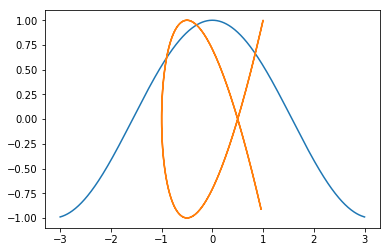

In [8]:
# create variables
x = np.linspace(-3, 3, 500)
y_1 = np.cos(1*x)
y_2 = np.cos(2*x)
y_3 = np.cos(3*x)

# plot stuff
plt.plot(x, y_1, y_2, y_3)

## 9 Visualizing Time-Dependent Phenomena

One current limitation with the online platform is support for python-generated gifs and movies but we can get around it with some visualization tricks.

Much of our intuition of the quantum world will be built around the dynamics of waves and particles across time. To visualize the temporal dimension in 2D, we will use color and also several snapshots of our functions/waves/particles at different points in time.

For this we have our own **quantumworldX** module which is normally loaded as `import quantumworldX as qw`. In particular when we want to visualize time we will want to use qw.time_plot(x, y, t, t_step=1).

Here $x$ is a spatial grid, $y$ a function evaluated on $x$ for several values of $t$, $t$ is a temporal grid and t_step indicates how many snapshots to skip for each plot, for example t_step=1 will use all snapshots, while t_step=10 will use every tenth snapshot.

Curious about what this wave looks like animated? [Check out this gif!](https://courses.edx.org/asset-v1:HarvardX+CHEM160+1T2017+type@asset+block@chap1_time-opt.gif).

**Instructions:**

- import the quantumworldX module.
- Create an array t from $[0,5]$ with a spacing of 0.01.
- Create an array x from $[0,2\pi]$ with 200 points in between.
- Create an array y of shape (len(x),len(t)),to hold each snapshot of a function across time, using the formula for a vibrating standing wave: $$ y(x) = \sin(x)\sin(t) $$
- Iterate over the t array and for each value of the array, compute the wave at this specific time and save it to a column of y.
- Use qw.time_plot with t_step=2

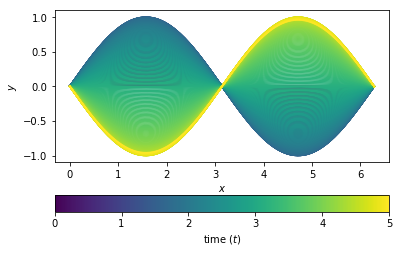

In [9]:
# create variables
t = np.arange(0, 5.01, 0.01)
x = np.linspace(0, 2*np.pi, 200)
y = np.zeros((len(x), len(t)))

# for-loop
for i in range(len(x)):
    for j in range(len(t)):
        y[i][j] = np.sin(x[i]) * np.sin(t[j])

# plot stuff
qw.time_plot(x, y, t, t_step=2)

In [15]:
# checking source, out of curiosity 
import inspect
print(inspect.getsource(qw.time_plot))

def time_plot(x, y, t, t_step=1):
    """Plot several plots overlaid across time

    Utility plotting function that will setup plots of several snapshots in
    time (t) of a function (y) over a spatial grid (x). You can control the
    frequency of these plots with t_step, with a higher value indicating less
    frequent plots across time. At some moment after use, `plt.show` should
    be utilized to display the figure.

    Args:
        x (:obj:`np.array`): 1-D array of shape `(n)` representing a spatial
            grid
        y (:obj:`np.array`): 2-D array of shape `(n,m)` representing several
            snapshots across time of a function on a spatial grid
        t (:obj:`np.array`): 1-D array of shape `(m)` representing a time grid
        t_step (int): integer indicating how many frames to skip for plotting,
            for example, t_step=10, means it will plot every 10 frame of t,
            while t_step=1, will plot every frame possible.

    Returns:
        Does not 

## 10 Encapsulating Code via Functions

Here we will put all your skills together. Our goal is to create a function in python that generates a square wave. You might be wondering, "What is a square wave, and what is it useful for?" If you're not familiar with square waves or their uses, check this link before you start: Square wave.

Now that you have a better understanding of square waves you are probably already thinking how to generate one. Rather than generating one on its own, we are going to use the Fourier expansion of the wave, building it up from a series of sine waves. To the $n$-th term, this expansion is:

\begin{align*} f(x) &= \frac{4}{\pi} \sum_{k=1}^n {\sin{\left (2\pi (2k-1) \omega x \right )}\over(2k-1)} \\
&= \frac{4}{\pi} \left(  \sin(2\pi \omega x) + \frac{1}{3} \sin(6\pi \omega x) ...  \right) \\
&= a_1 + a_2 + \cdots + a_n \end{align*}

To compute each component we will create a function. A function is a way of encapsulating pieces of code so you can use them repeatedly. For example, a function that will return the second component of this sum would be:

```python 
def second_component(x,omega):
    val = (4.0/np.pi)* np.sin(2*np.pi*(2*2-1)*omega*x)/(2*2-1)
    return val
```

To start defining a function, use the keyword `def`, then the name second_component followed by the input variables (x,omega). Then you can have all the properly indented code you want until you use the return statement which tells the function to end and return an output variable val.

**Instructions:**

- Create an array x from $[0,1]$ with 500 points, an array y of shape (5,500) filled with zeros. Also a variable omega with value 2.
- Create a function called square_component with three input variables x, omega and k which returns the $k$-th term from the square wave approximation.
- Use square_component with omega to save the first 5 components into an array y of shape (5,500).
- Plot each component overlayed on each other.

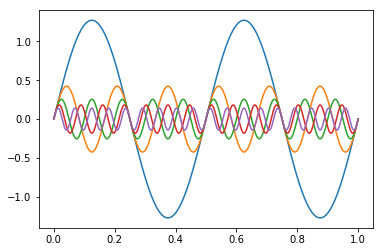

In [27]:
# define your function
def square_component(x, omega, k):
    return (4.0/np.pi) * np.sin(2*np.pi*(2*k-1)*omega*x)/(2*k-1)

# create variables
x = np.linspace(0, 1, 500)
y = np.zeros((5, 500))
omega = 2

# for-loop it
for i in range(5):
    j = i+1
    output = square_component(x, omega, j)
    y[i] = output

fig = plt.plot(x, y[0], x, y[1], x, y[2], x, y[3], x, y[4])

## 11 Build (almost) a Square Wave!

From the previous function we built we can now try to see the behavior of this approximate wave when n gets bigger and bigger ($n \to \infty$). Remember the approximate square wave was defined as:

\begin{align*} f(x) &= \frac{4}{\pi} \sum_{k=1}^n {\sin{\left (2\pi (2k-1) \omega x \right )}\over(2k-1)} \\
&= \frac{4}{\pi} \left(  \sin(2\pi \omega x) + \frac{1}{3} \sin(6\pi \omega x) ...  \right) \\
&= a_1 + a_2 + \cdots + a_n \end{align*}

Now with the `square_component` function, we will create another function called `square_approx(x,omega,n)` which will sum all components up to degree n.

Here you can see an [animation of what the convergence looks like here](http://courses.edx.org/asset-v1:HarvardX+CHEM160+1T2017+type@asset+block@chap1_square-opt.gif).

**Instructions:**
Assumptions: function `square_component(x,omega,k)` and variable `omega` and a array `x` come pre-loaded from the previous exercise.

- Define a function square_approx(x,omega,n) that sums the first n components of the square wave. You will probably want to use a for-loop and square_component inside.
- Create an array y of shape (6,len(x)) to save the approximations of the square wave for several values of n.
- Iterate over the list [1, 2, 8, 32, 128, 512] and in each iteration, use square_approx to save a wave at each step.
- Plot each approximation overlayed on each other. Add some legends and labels if you want to beautify that graph.

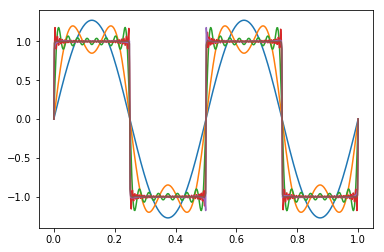

In [42]:
# define your function around here
def square_approx(x,omega,n):
    approx = np.zeros(x.shape)
    
    for i in range(n):
        j = i+1
        output = square_component(x, omega, j)
        approx += output
    
    return approx

# initial variables
omega=2
x = np.linspace(0,1,500)
y = np.zeros((6, len(x)))

# for-loop it
check_sizes = [1, 2, 8, 32, 128, 512]
for i in range(len(check_sizes)):
    y[i] = square_approx(x, omega, check_sizes[i])

fig = plt.plot(x, y[0], x, y[1], x, y[2], x, y[3], x, y[4], x, y[5])